In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt1,  analyze_expt2,  analyze_expt3, analyze_expt4, analyze_expt5

In [2]:
trial_data_all, subjects, cue_level_names, image_type_names = analyze_expt3.load_data()
 
# n_subjects = len(subjects)
# n_cue_levels = len(cue_level_names)
# n_image_types = len(image_type_names)

acc_by_condition1, dprime_by_condition1, propyes_by_condition1, rt_by_condition1 = analyze_expt1.get_perf_by_cond()

acc_by_condition2, dprime_by_condition2, propyes_by_condition2, rt_by_condition2 = analyze_expt2.get_perf_by_cond()

acc_by_condition3, dprime_by_condition3, propleft_by_condition3, rt_by_condition3 = analyze_expt3.get_perf_by_cond()

acc_by_condition4, dprime_by_condition4, propleft_by_condition4, rt_by_condition4 = analyze_expt4.get_perf_by_cond()

acc_by_condition5, dprime_by_condition5, propleft_by_condition5, rt_by_condition5 = analyze_expt5.get_perf_by_cond()


In [3]:
# expt 1 is color, 2 is grayscale
acc_by_nat1, dprime_by_nat1, propyes_by_nat1, rt_by_nat1 = analyze_expt1.get_perf_by_nat()
acc_by_nat2, dprime_by_nat2, propyes_by_nat2, rt_by_nat2 = analyze_expt2.get_perf_by_nat()

In [4]:
acc_by_nat3, dprime_by_nat3, rt_by_nat3 = analyze_expt3.get_perf_by_nat()
acc_by_nat4, dprime_by_nat4, rt_by_nat4 = analyze_expt4.get_perf_by_nat()
acc_by_nat5, dprime_by_nat5, rt_by_nat5 = analyze_expt5.get_perf_by_nat()

In [5]:
dprime_by_nat1.shape

(47, 2, 5, 2)

In [6]:
colors = np.flipud(cm.BuPu(np.linspace(0, 1, 7)))
expt_names = ['Expt 1','Expt 2','Expt 3', 'Expt 4', 'Expt 5']

cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']


In [7]:
cue_level_names, image_type_names

(array(['basic', 'super'], dtype=object),
 array(['pool1', 'pool2', 'pool3', 'pool4', 'orig'], dtype=object))

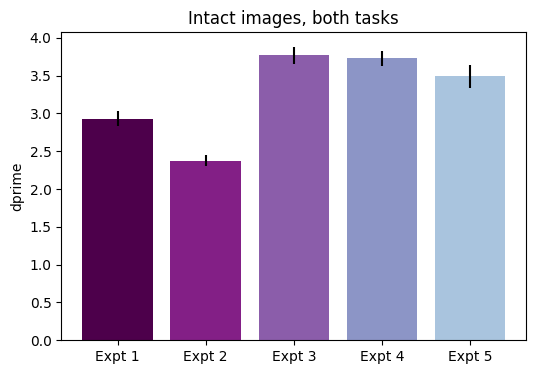

In [9]:
plt.figure(figsize=(6,4))

for ei, vals in enumerate([dprime_by_condition1, dprime_by_condition2, 
                           dprime_by_condition3, dprime_by_condition4, dprime_by_condition5]):

    v = np.mean(vals[:,:,4], axis=1)
    
    meanvals = np.mean(v)
    semvals = np.std(v) / np.sqrt(len(v))

    plt.bar(ei, meanvals, color=colors[ei,:])
    plt.errorbar(ei, meanvals, semvals, linestyle='none', color='k')
    
plt.xticks(np.arange(len(expt_names)), expt_names);
plt.ylabel('dprime')

plt.title('Intact images, both tasks');

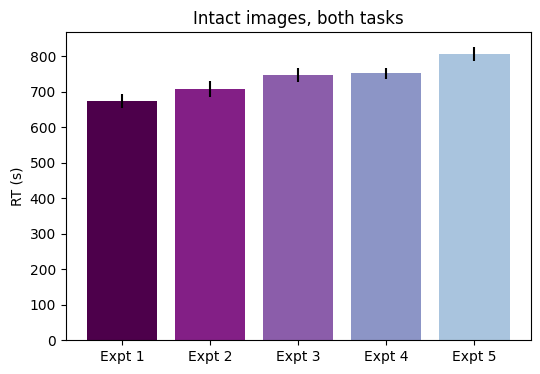

In [10]:
plt.figure(figsize=(6,4))

for ei, vals in enumerate([rt_by_condition1, rt_by_condition2, 
                           rt_by_condition3, rt_by_condition4, rt_by_condition5]):

    v = np.mean(vals[:,:,4], axis=1)
    
    meanvals = np.mean(v)
    semvals = np.std(v) / np.sqrt(len(v))

    plt.bar(ei, meanvals, color=colors[ei,:])
    plt.errorbar(ei, meanvals, semvals, linestyle='none', color='k')
       
plt.xticks(np.arange(len(expt_names)), expt_names);
plt.ylabel('RT (s)')

plt.title('Intact images, both tasks');

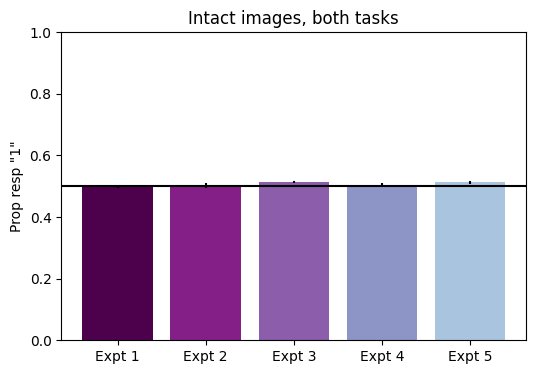

In [13]:
plt.figure(figsize=(6,4))

for ei, vals in enumerate([propyes_by_condition1, propyes_by_condition2, 
                           propleft_by_condition3, propleft_by_condition4, propleft_by_condition5]):

    v = np.mean(vals[:,:,4], axis=1)
    
    meanvals = np.mean(v)
    semvals = np.std(v) / np.sqrt(len(v))

    plt.bar(ei, meanvals, color=colors[ei,:])
    plt.errorbar(ei, meanvals, semvals, linestyle='none', color='k')
    
plt.xticks(np.arange(len(expt_names)), expt_names);
plt.ylabel('Prop resp "1"')
plt.ylim([0,1])
plt.axhline(0.5, color='k')

plt.title('Intact images, both tasks');

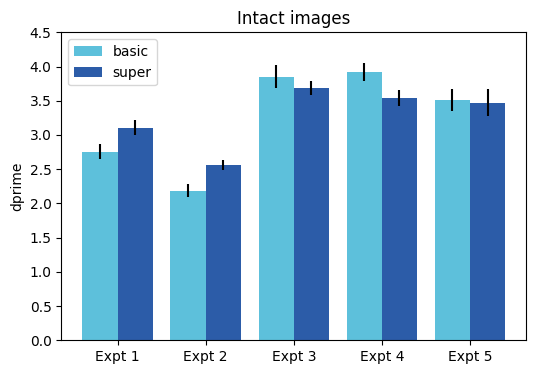

In [14]:
        
plt.figure(figsize=(6,4))

ax = plt.subplot(1,1,1)

lh = []

for ei, vals in enumerate([dprime_by_condition1, dprime_by_condition2, 
                           dprime_by_condition3, dprime_by_condition4, dprime_by_condition5]):

    for cc, cond_name in enumerate(cue_level_names):
    
        v = vals[:,cc,4]
   
        meanvals = np.mean(v)
        semvals = np.std(v) / np.sqrt(len(v))
    
        h = plt.bar(ei+xjitters[cc], meanvals, color=cue_level_colors[cc,:], width=barwidth)
        plt.errorbar(ei+xjitters[cc], meanvals, semvals, linestyle='none', color='k')

        lh.append(h)
        
plt.xticks(np.arange(len(expt_names)), expt_names);
plt.ylabel('dprime')
plt.ylim([0, 4.5])

plt.title('Intact images');

ax.legend(lh, cue_level_names, loc='upper left')


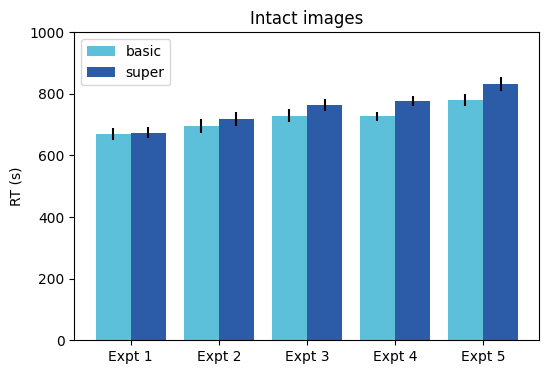

In [15]:
        
plt.figure(figsize=(6,4))

ax = plt.subplot(1,1,1)

lh = []

for ei, vals in enumerate([rt_by_condition1, rt_by_condition2, 
                           rt_by_condition3, rt_by_condition4, rt_by_condition5]):

    for cc, cond_name in enumerate(cue_level_names):
    
        v = vals[:,cc,4]
   
        meanvals = np.mean(v)
        semvals = np.std(v) / np.sqrt(len(v))
    
        h = plt.bar(ei+xjitters[cc], meanvals, color=cue_level_colors[cc,:], width=barwidth)
        plt.errorbar(ei+xjitters[cc], meanvals, semvals, linestyle='none', color='k')

        lh.append(h)

plt.xticks(np.arange(len(expt_names)), expt_names);
plt.ylabel('RT (s)')
plt.ylim([0, 1000])

plt.title('Intact images');

ax.legend(lh, cue_level_names, loc='upper left')


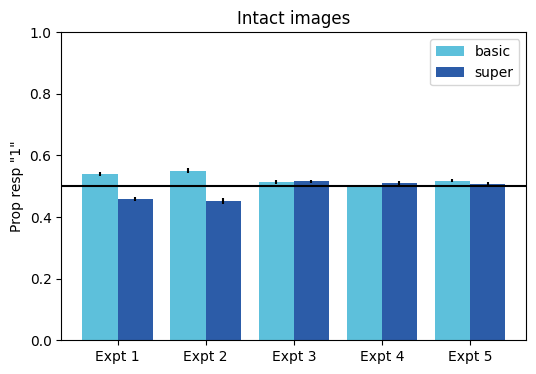

In [17]:
        
plt.figure(figsize=(6,4))

ax = plt.subplot(1,1,1)

lh = []

for ei, vals in enumerate([propyes_by_condition1, propyes_by_condition2, 
                           propleft_by_condition3, propleft_by_condition4, propleft_by_condition5]):

    for cc, cond_name in enumerate(cue_level_names):
    
        v = vals[:,cc,4]
   
        meanvals = np.mean(v)
        semvals = np.std(v) / np.sqrt(len(v))
    
        h = plt.bar(ei+xjitters[cc], meanvals, color=cue_level_colors[cc,:], width=barwidth)
        plt.errorbar(ei+xjitters[cc], meanvals, semvals, linestyle='none', color='k')

        lh.append(h)

plt.xticks(np.arange(len(expt_names)), expt_names);
plt.ylabel('Prop resp "1"')
plt.ylim([0,1])
plt.axhline(0.5, color='k')

plt.title('Intact images');

ax.legend(lh, cue_level_names, loc='upper right')


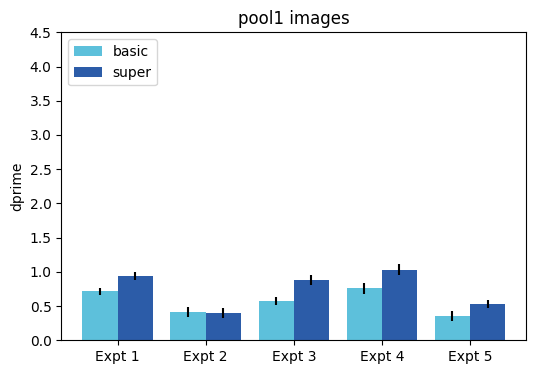

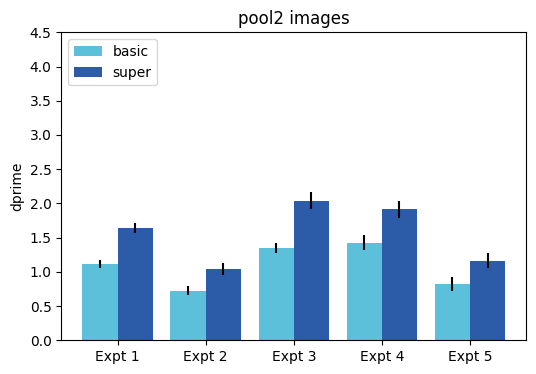

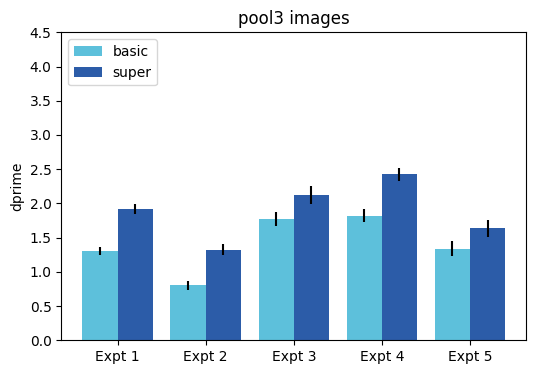

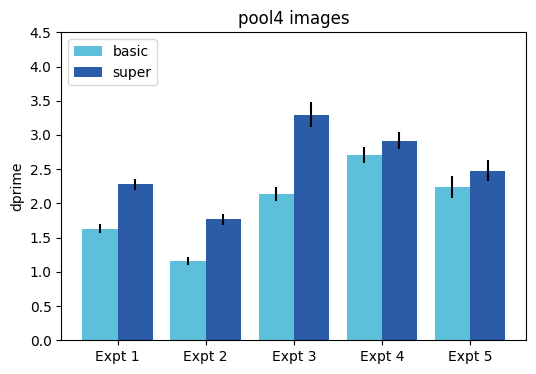

In [18]:
for ii in range(4):
        
    plt.figure(figsize=(6,4))
    
    ax = plt.subplot(1,1,1)
    
    lh = []
    
    for ei, vals in enumerate([dprime_by_condition1, dprime_by_condition2, 
                               dprime_by_condition3, dprime_by_condition4, dprime_by_condition5]):
    
        for cc, cond_name in enumerate(cue_level_names):
        
            v = vals[:,cc,ii]
       
            meanvals = np.mean(v)
            semvals = np.std(v) / np.sqrt(len(v))
        
            h = plt.bar(ei+xjitters[cc], meanvals, color=cue_level_colors[cc,:], width=barwidth)
            plt.errorbar(ei+xjitters[cc], meanvals, semvals, linestyle='none', color='k')
    
            lh.append(h)
            
    plt.xticks(np.arange(len(expt_names)), expt_names);
    plt.ylabel('dprime')
    plt.ylim([0, 4.5])
    
    plt.title('%s images'%image_type_names[ii]);
    
    ax.legend(lh, cue_level_names, loc='upper left')


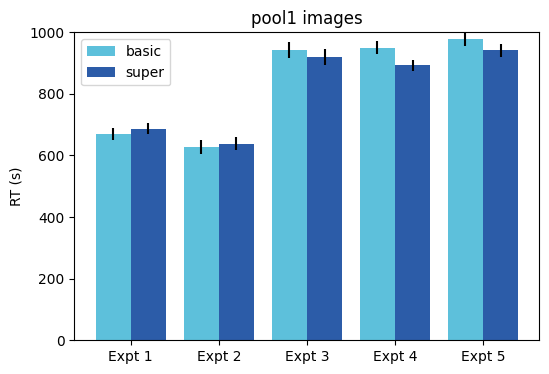

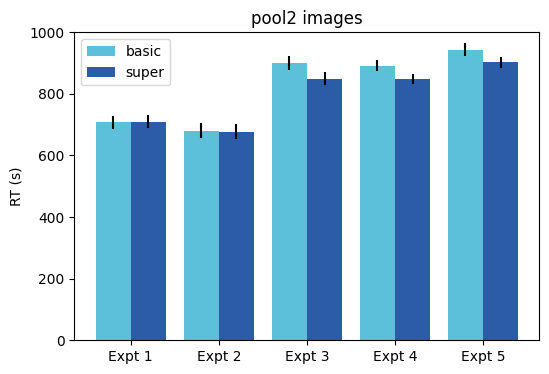

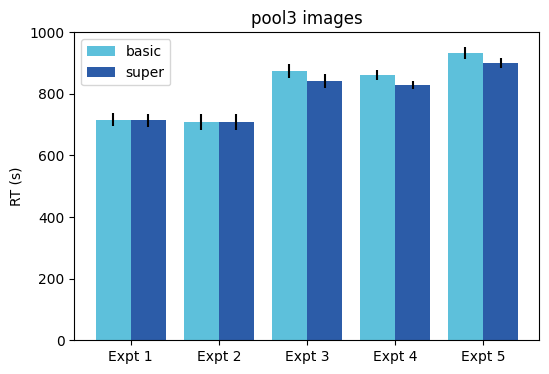

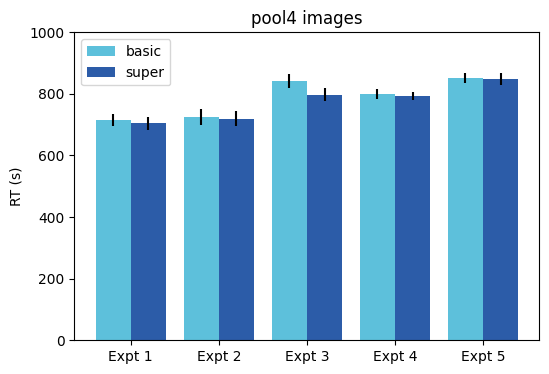

In [19]:
for ii in range(4):
        
    plt.figure(figsize=(6,4))
    
    ax = plt.subplot(1,1,1)
    
    lh = []
    
    for ei, vals in enumerate([rt_by_condition1, rt_by_condition2, 
                               rt_by_condition3, rt_by_condition4, rt_by_condition5]):
    
        for cc, cond_name in enumerate(cue_level_names):
        
            v = vals[:,cc,ii]
       
            meanvals = np.mean(v)
            semvals = np.std(v) / np.sqrt(len(v))
        
            h = plt.bar(ei+xjitters[cc], meanvals, color=cue_level_colors[cc,:], width=barwidth)
            plt.errorbar(ei+xjitters[cc], meanvals, semvals, linestyle='none', color='k')
    
            lh.append(h)
            
    plt.xticks(np.arange(len(expt_names)), expt_names);
    plt.ylabel('RT (s)')
    plt.ylim([0, 1000])
    
    plt.title('%s images'%image_type_names[ii]);
    
    ax.legend(lh, cue_level_names, loc='upper left')


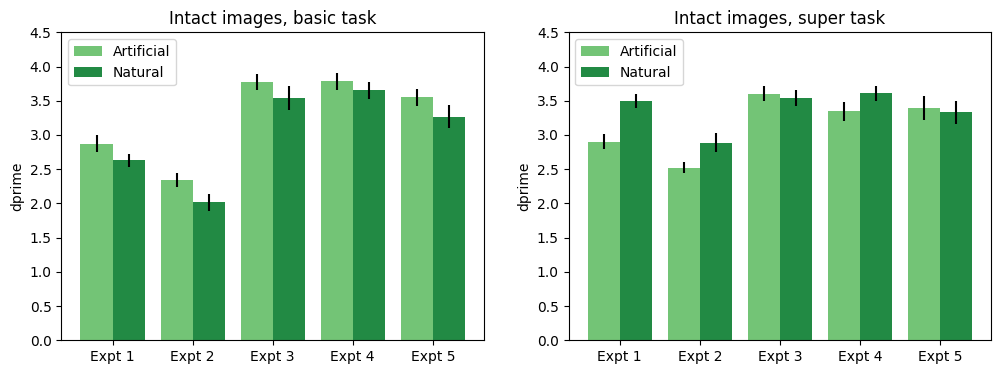

In [20]:
plt.figure(figsize=(12,4))
    

for cc, cond_name in enumerate(cue_level_names):
        
        
    
    ax = plt.subplot(1,2,cc+1)
    
    lh = []
    
    for ei, vals in enumerate([dprime_by_nat1, dprime_by_nat2, 
                               dprime_by_nat3, dprime_by_nat4, dprime_by_nat5]):
    
        for nn, kind_name in enumerate(kind_names):
        
            v = vals[:,cc,4,nn]
       
            meanvals = np.mean(v)
            semvals = np.std(v) / np.sqrt(len(v))
        
            h = plt.bar(ei+xjitters[nn], meanvals, color=nat_colors[nn,:], width=barwidth)
            plt.errorbar(ei+xjitters[nn], meanvals, semvals, linestyle='none', color='k')
    
            lh.append(h)
            
    plt.xticks(np.arange(len(expt_names)), expt_names);
    plt.ylabel('dprime')
    plt.ylim([0, 4.5])
    
    plt.title('Intact images, %s task'%cond_name);
    
    ax.legend(lh, kind_names, loc='upper left')


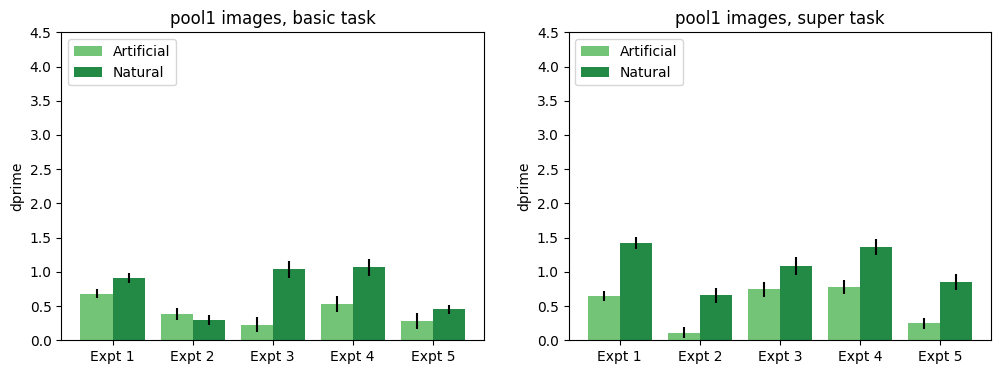

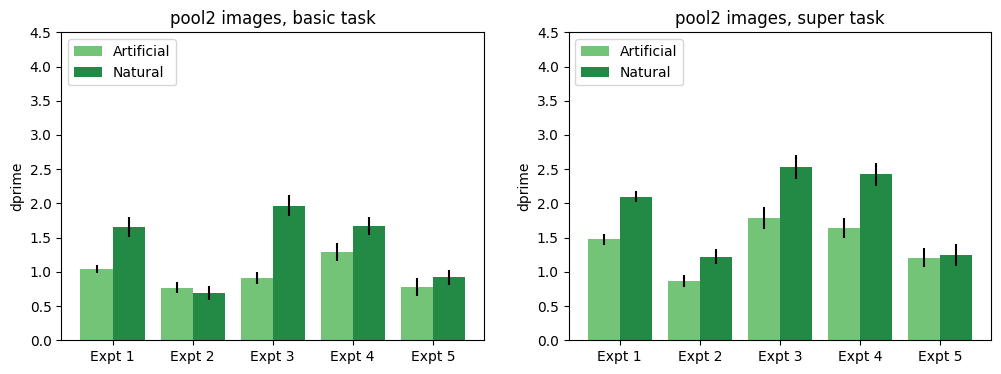

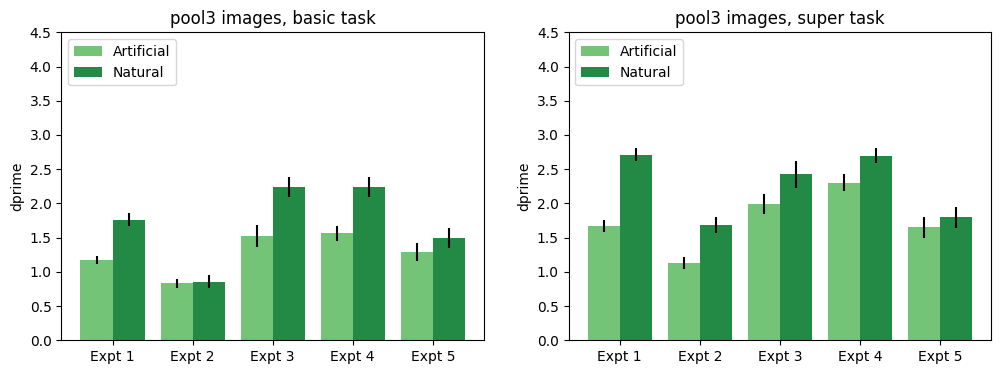

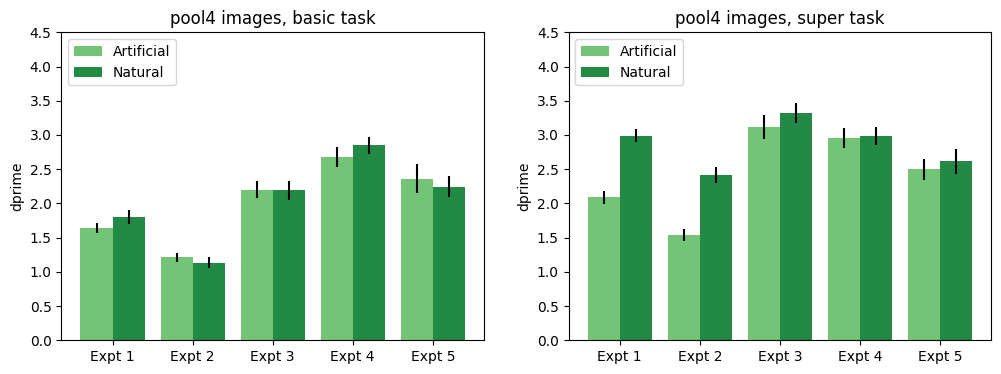

In [21]:
for ii in range(4):

        
    plt.figure(figsize=(12,4))
        
    
    for cc, cond_name in enumerate(cue_level_names):
            
            
        
        ax = plt.subplot(1,2,cc+1)
        
        lh = []
        
        for ei, vals in enumerate([dprime_by_nat1, dprime_by_nat2, 
                                   dprime_by_nat3, dprime_by_nat4, dprime_by_nat5]):
        
            for nn, kind_name in enumerate(kind_names):
            
                v = vals[:,cc,ii,nn]
           
                meanvals = np.mean(v)
                semvals = np.std(v) / np.sqrt(len(v))
            
                h = plt.bar(ei+xjitters[nn], meanvals, color=nat_colors[nn,:], width=barwidth)
                plt.errorbar(ei+xjitters[nn], meanvals, semvals, linestyle='none', color='k')
        
                lh.append(h)
                
        plt.xticks(np.arange(len(expt_names)), expt_names);
        plt.ylabel('dprime')
        plt.ylim([0, 4.5])
        
        plt.title('%s images, %s task'%(image_type_names[ii], cond_name));
        
        ax.legend(lh, kind_names, loc='upper left')
